In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [151]:
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
#plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

pd.options.display.float_format = '{:20,.0f}'.format
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = 99
warnings.filterwarnings('ignore')

## data 살펴보기

In [152]:
df = pd.read_excel('closetshare.xlsx')
df = df.rename(columns=str.lower)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1442 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   user        1471 non-null   object        
 3   reg_date    1466 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1295 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


In [154]:
df.describe()

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
count,1442,1471,1471,1466,1471,1471,1471,1295
unique,245,979,1234,368,90,2,6,1
top,Gucci,chevron quilted cross bag black,a1149461,2021-03-16 00:00:00,2021-03-24 00:00:00,4days,BA,Y
freq,232,23,11,44,47,894,692,1295
first,NaN,NaN,NaN,2017-06-24 00:00:00,2021-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-03-31 00:00:00,2021-03-31 00:00:00,NaN,NaN,NaN


In [155]:
df.head()

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y


## 결측치

In [156]:
df.isna().sum()

brandnm        29
goodsnm         0
user            0
reg_date        5
order_date      0
p_type          0
sub_type        0
app_yn        176
dtype: int64

In [157]:
# 팀 공통
# app_yn 값 0, 1 치환
df['app_yn'] = df['app_yn'].fillna(0)
df.loc[(df.app_yn == 'Y'), 'app_yn'] = 1

In [158]:
df.isna().sum()

brandnm       29
goodsnm        0
user           0
reg_date       5
order_date     0
p_type         0
sub_type       0
app_yn         0
dtype: int64

In [159]:
# reg_date NA값 채우기
df[df['reg_date'].isna()]

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn
265,Gucci,mamont chain bag red,a1144008,NaT,2021-01-21,7days,BA,1
351,Lanvin,banding point jumper skyblue,a1142855,NaT,2021-01-18,7days,O,0
564,Gucci,leather point cross bag,a1146490,NaT,2021-02-18,4days,BA,1
746,Fendi,monogram zucchino shoulder bag,a1145478,NaT,2021-02-04,4days,BA,0
1254,Fendi,back to school bag 1,a1149094,NaT,2021-03-12,7days,BA,1


In [160]:
df['user_id'] = 0

for i in range(len(df)):
    df['user_id'][i] = df['user'][i][1:]

In [161]:
df['user_id'] = df['user_id'].astype(int)

In [162]:
df.loc[(df.user_id == 1144008), 'reg_date'] = pd.to_datetime('2021-01-21')
df.loc[(df.user_id == 1142855), 'reg_date'] = pd.to_datetime('2021-01-13') # 우선 13일로 추가
df.loc[(df.user_id == 1146490), 'reg_date'] = pd.to_datetime('2021-02-15')
df.loc[(df.user_id == 1145478), 'reg_date'] = pd.to_datetime('2021-02-04')
df.loc[(df.user_id == 1149094), 'reg_date'] = pd.to_datetime('2021-03-12')

In [163]:
df.isna().sum()

brandnm       29
goodsnm        0
user           0
reg_date       0
order_date     0
p_type         0
sub_type       0
app_yn         0
user_id        0
dtype: int64

In [164]:
# brand NA 29개
# brand name NA값들은 전부 TP인 경우이다.
# 상하의로 쪼개서 2값으로 넣으려고 했지만, 다른 한벌 상품들이랑 구매 가격이 똑같다. 약간 떨이 느낌
# 따라서 상품을 찾아서 brand name만 채워넣었다.
# 상하의가 서로 브랜드가 다른 경우, 더 인지도가 높은 브랜드 명을 채워넣었다.

In [165]:
df.loc[146, 'brandnm'] = 'Fendi' # 상의는 YCH ?
df.loc[147, 'brandnm'] = 'Mojosphine'
df.loc[160, 'brandnm'] = 'Fayewoo'
df.loc[220, 'brandnm'] = 'Nakes'
df.loc[267, 'brandnm'] = 'Vw vera Wang'
df.loc[282, 'brandnm'] = 'Gucci'
df.loc[285, 'brandnm'] = 'Chanel'
df.loc[329, 'brandnm'] = 'Plastic Island'
df.loc[342, 'brandnm'] = 'Sonia Rykiel'
df.loc[368, 'brandnm'] = 'El estilo de Claire'
df.loc[373, 'brandnm'] = 'Moschino'
df.loc[443, 'brandnm'] = 'Saint James'
df.loc[505, 'brandnm'] = 'EunjoKoh'
df.loc[525, 'brandnm'] = 'Vw vera Wang'
df.loc[526, 'brandnm'] = 'Rejina Pyo'
df.loc[544, 'brandnm'] = 'Miu Miu'
df.loc[765, 'brandnm'] = 'El estilo de Claire'
df.loc[766, 'brandnm'] = 'Miu Miu'
df.loc[879, 'brandnm'] = 'Olive des Olive'
df.loc[892, 'brandnm'] = 'Sandro'
df.loc[931, 'brandnm'] = 'Balmain' # + 다른 브랜드
df.loc[946, 'brandnm'] = 'Fayewoo'
df.loc[957, 'brandnm'] = 'It michaa'
df.loc[1062, 'brandnm'] = 'SJYP' # 현재 상의는 있는데 하의는 없음. 이제 상의만 렌트하는듯. 상의 브랜드 넣음
df.loc[1210, 'brandnm'] = 'Mine' # Mine, Chee U 두 브랜드에서 똑같은 이름의 투피스 상품이 있음. 인지도에 따라 Mine으로 넣음
df.loc[1385, 'brandnm'] = 'Mojosphine'
df.loc[1405, 'brandnm'] = 'Plastic Island'

In [166]:
# 넣으면서 알아낸 쓸모없는 사실
# goods name은 여러 단어의 조합이다. 버튼이 있고 패턴이 없는 검은색 자켓이면 button + basic + pattern + jacket + black 이렇게 쓰는 식
# 따라서 브랜드는 다르지만 상품명은 같은 제품이 많다.
# button basic pattern jacket black 검색해보면 확인할 수 있습니다.

# 2개는 못 넣었다ㅠ
# df.loc[993, 'goodsnm'] : 상하의 다 없음.. 판매중지인듯
# df.loc[1160, 'goodsnm'] : 투피스 상품은 없어진듯. 상하의 따로는 있는데 브랜드가 많아서 대입하기 힘듬

In [167]:
df.isna().sum()

brandnm       2
goodsnm       0
user          0
reg_date      0
order_date    0
p_type        0
sub_type      0
app_yn        0
user_id       0
dtype: int64

In [168]:
# 2개는 N/A ? drop? 우선 N/A
df = df.fillna('N/A')

## Feature Engineering

In [169]:
# 가입 정보 관련 날짜 변수 추가 
df['reg_date']=pd.to_datetime(df['reg_date'])
df['reg_year']=df['reg_date'].dt.strftime('%Y')
df['reg_month']=df['reg_date'].dt.strftime('%m')## Feature Engineering
df['reg_yearmonth']=df['reg_date'].dt.strftime('%Y-%m')
df['reg_dayofweek']=df['reg_date'].dt.dayofweek
df['order_month']=df['order_date'].dt.month
df['order_week']=df['order_date'].dt.week
df['order_day']=df['order_date'].dt.day
df['order_dayofweek']=df['order_date'].dt.dayofweek
df['new'] = np.where(df['reg_year'].values == '2021', 1, 0)

# date continuous변환
df['order_date']=pd.to_datetime(df['order_date']).dt.date
df['reg_date']=pd.to_datetime(df['reg_date']).dt.date

# 구매 전환 날짜
df['first'] = (df['order_date'] - df['reg_date']).dt.days
df['isfirst'] = np.where(df['first'].values <= 1, True, False)
df['level'] = np.where(df['first'].values == 0, '당일구매', np.where(df['first'].values == 1, '1일이내구매', np.where(df['first'].values < 7, '1주일이내구매', np.where(df['first'].values < 30, '1달이내구매', '1달경과후구매'))))

In [170]:
# 2021 top 10 list
luxury_list=['GUCCI','Louis Vuitton','Cartier','Chanel','Hermes','Ferrari','Rolex','Dior','Christian Dior','COACH','Estee Lauder','Tiffany & Co.',
'Guerlain','Burberry','Prada','Lancôme','Omega','Clarins','Bulgari','Moncler','Saint Laurent','SK-II','McLaren','TAG Heuer','Givenchy','Lamborghini','Armani','Bottega Veneta','Rolls- Royce',
'Bentley','Aston Martin','Loewe','Maserati','Van Cleef & Arpels','Valentino','Salvatore Ferragamo','Shiseido','Sulwhasoo','Tissot','Versace','Bobbi Brown','Montblanc','Tom Ford','Longines','Cle de Peau Beaute','Jaeger-LeCoultre',
'Celine','Dolce & Gabbana','Miu Miu','Fendi']
# brandnm luxury 
df['brandnm_luxury']=np.where(df['brandnm'].isin(luxury_list), 1,0)

In [171]:
# df_user 유저 기본 정보 테이블생성
df_user = df.groupby(['user','reg_date','reg_yearmonth','order_date','order_month','order_week','order_dayofweek'])['goodsnm'].count().to_frame().reset_index().rename(columns={'goodsnm':'order_count'}) 
ptype = df.pivot_table(index='user', columns='p_type',values= 'order_date',aggfunc='count').fillna(0).reset_index()
subtype = df.pivot_table(index='user', columns='sub_type',values= 'order_date',aggfunc='count').fillna(0).reset_index()
app = df.pivot_table(index='user', columns='app_yn',values= 'order_date',aggfunc='count').fillna(0).reset_index().rename(columns={'Y':'app'}) 
luxury=df.pivot_table(index='user',values= 'brandnm_luxury',aggfunc='sum').fillna(0).reset_index()

# merge
df_user = df_user.merge(ptype, how='left', on='user').merge(app, how='left', on='user').merge(subtype, how='left', on='user').fillna(0)
df_user.head(5)

,user,reg_date,reg_yearmonth,order_date,order_month,order_week,order_dayofweek,order_count,4days,7days,0,1,B,BA,D,O,T,TP
0,a1100548,2020-05-16,2020-05,2021-03-31,3,13,2,2,2.00,0.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00
1,a1100887,2020-05-19,2020-05,2021-03-29,3,13,0,1,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
2,a1101514,2020-05-25,2020-05,2021-02-05,2,5,4,1,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
3,a1101645,2020-05-26,2020-05,2021-02-23,2,8,1,1,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
4,a1102068,2020-05-29,2020-05,2021-03-04,3,9,3,1,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00


In [172]:
# 2건 이상 heavy user로 규정
heavy_list=df_user.query('order_count>1').user.tolist()
df['seg_heavy']=np.where(df.user.isin(heavy_list),1,0)

## EDA

In [173]:
# 1. 날짜별 판매량 변화 추이

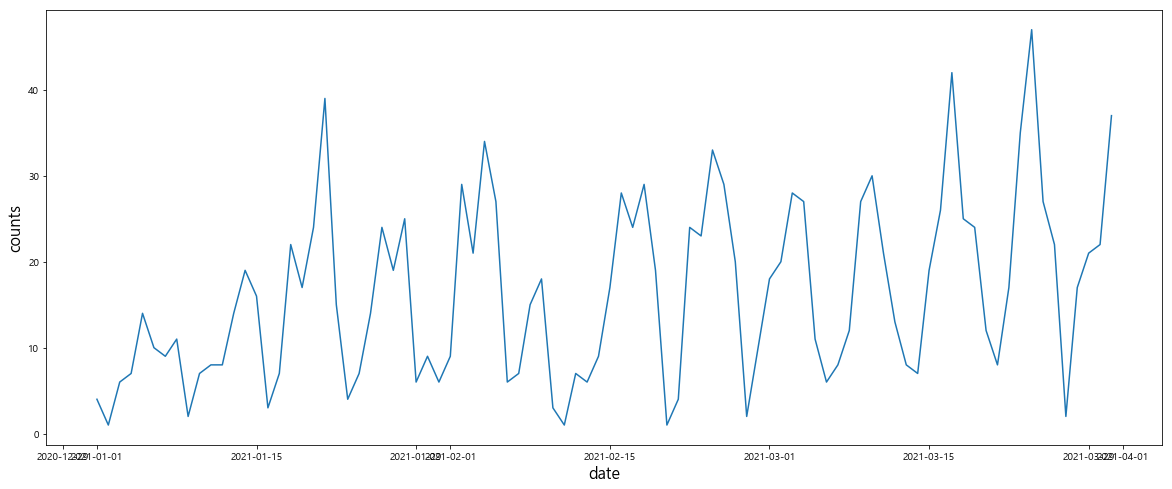

In [174]:
df_count = df.groupby('order_date')['user'].value_counts().groupby('order_date').sum().reset_index()

plt.figure(figsize=(20,8))
sns.lineplot(data = df_count,
             x = df_count['order_date'], y = df_count['user'])
plt.ylabel('counts', fontsize=16)
plt.xlabel('date', fontsize=16)
plt.show()


In [175]:
# 2. 요일별 판매량 변화 추이

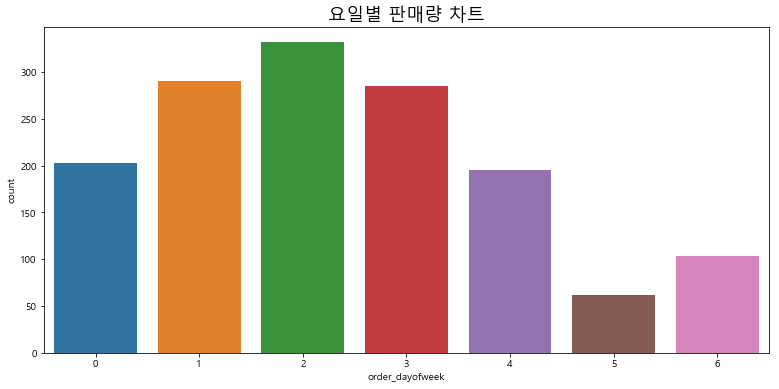

In [176]:
plt.figure(figsize=(13,6))
sns.countplot(data = df, x = 'order_dayofweek')
plt.title('요일별 판매량 차트', fontsize=18);


그래프를 보고 배송 날짜나 렌트 기간에 대해 궁금증이 생겨서 클로젯셰어 카톡 상담을 했는데, 내용은 다음과 같다.

1. 주문 시간에 따른 배송 안내

>서울 지역의 경우 오전 8시 주문 건까지 당일출고, 당일수령 (오후 2-7시 사이 당일수령) <br>
>경기/지방 지역은 오후 4시 주문 건까지 택배로 당일 출고되며 일요일 제외 1-2일 내 수령 가능합니다.
>
>모든 주문은 평일기준이며, 주말(토,일)/공휴일은 그 다음 평일에 출고 이루어 집니다.

2. 렌트 기간은 수령일 기준 or 구매일 기준?

>멤버십은 결제일부터 한달입니다. 1회권이라면 수령일 기준이 맞습니다!

3. 반납

>이용일 다음날 기사님 방문하여 받아갑니다. (주말제외)


정리하면 요일별 판매량은 화수목이 많은데 배송 + 반납 등을 고려했을 때 금요일, 토요일에 사용하기 위한 것으로 보여진다.


In [177]:
# order_date 분배
df['order_date'].sort_values()
# 1월 1일 ~ 3월 31일

135    2021-01-01
134    2021-01-01
133    2021-01-01
132    2021-01-01
131    2021-01-02
          ...    
856    2021-03-31
855    2021-03-31
854    2021-03-31
861    2021-03-31
849    2021-03-31
Name: order_date, Length: 1471, dtype: object

In [178]:
# user와 order_date가 1:1 매칭인가요? 네
df.groupby(['user','order_date'], as_index=False).sum().value_counts().describe()

count   1234.00
mean       1.00
std        0.00
min        1.00
25%        1.00
50%        1.00
75%        1.00
max        1.00
dtype: float64

In [179]:
df['first'].value_counts()

0      352
1      147
3      119
2      107
5       32
      ... 
395      1
391      1
382      1
381      1
298      1
Name: first, Length: 324, dtype: int64

In [180]:
# 전체 1234명의 user
df['user'].unique().shape

(1234,)

In [181]:
# 가입 1일 이내 전환 유저 499명
df.query('first <= 1').shape

(499, 23)

In [182]:
# 약 40%가 가입 후 1일 이내 구매 전환 유저
499 / 1234

0.40437601296596437

In [183]:
# 월별 1일 이내 구매 전환 유저는?
df_first = df.query('first <= 1').groupby('order_month')['first'].value_counts().groupby('order_month').sum().reset_index()
df_first

,order_month,first
0,1,88
1,2,182
2,3,229


In [184]:
# 월별 전체 구매 유저는?
df_all = df.groupby('order_month')['first'].value_counts().groupby('order_month').sum().reset_index()
df_all = df_all.rename(columns = {'first': 'all'}, inplace = False)
df_all

,order_month,all
0,1,377
1,2,455
2,3,639


In [185]:
df_fa = pd.concat([df_first, df_all['all']], axis = 1)
df_fa

,order_month,first,all
0,1,88,377
1,2,182,455
2,3,229,639


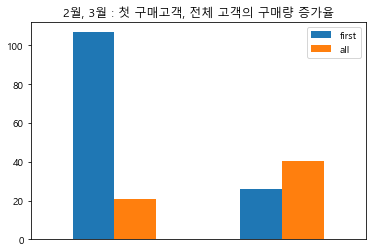

In [186]:
# 3. 2월, 3월의 첫 구매고객, 전체 고객의 구매량 증가율
(df_fa.pct_change()*100)[['first', 'all']].dropna().plot(kind = 'bar', rot = 0)
plt.xticks(np.arange(2, 3))
plt.title('2월, 3월 : 첫 구매고객, 전체 고객의 구매량 증가율');

In [187]:
#            2월   3월
# 1일이내   106     25.8
# 전체      20.7   40.4  (단위 : %)

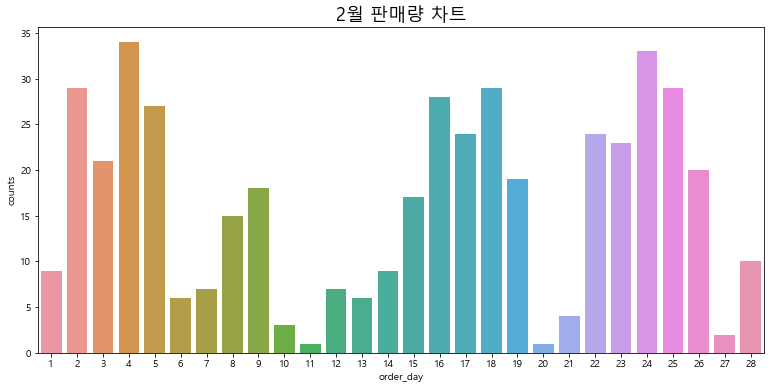

In [188]:
# 첫 구매 고객이 2월에 급증했다.. 그 이유는?
plt.figure(figsize=(13,6))
sns.barplot(data = df.query('order_month==2').groupby('order_day')['user'].value_counts().groupby('order_day').sum().reset_index(), 
         x = 'order_day', y = 'user')
plt.ylabel('counts')
plt.title('2월 판매량 차트', fontsize=18);

# 날짜 데이터만 놓고 보면 잘 모르겠다. 할인행사를 진행했나?

In [189]:
df.query('order_month==2').groupby('app_yn')['user'].value_counts().groupby('app_yn').sum().reset_index()

,app_yn,user
0,0,47
1,1,408


In [190]:
df.query('order_month==2').groupby('brandnm')['user'].value_counts().groupby('brandnm').sum().reset_index().sort_values('user', ascending = False).head(20)

,brandnm,user
52,Gucci,76
28,Chanel,37
101,Saint Laurent,31
65,Louis Vuitton,27
90,Prada,23
123,Yves Saint Laurent,14
112,Thom Browne,13
20,Burberry,12
48,Fendi,11
73,Max Mara,9


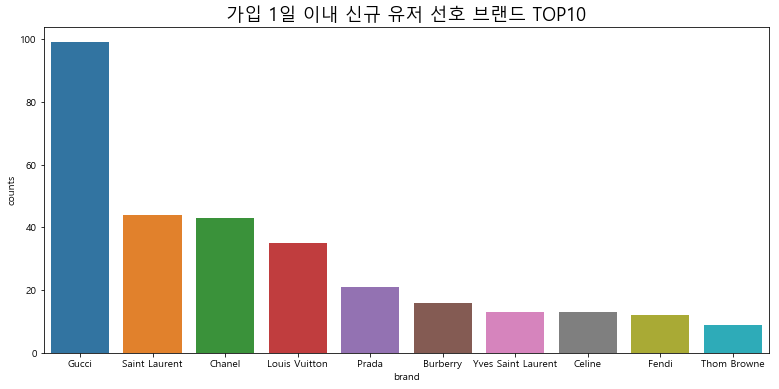

In [191]:
# 4. 신규 유저의 선호 브랜드는?
df_brand = df.query('isfirst == True')['brandnm'].value_counts().head(10).reset_index()
df_brand = df_brand.rename(columns = {'index': 'brand', 'brandnm':'counts'}, inplace = False)

plt.figure(figsize=(13,6))
sns.barplot(data = df_brand, 
         x = 'brand', y = 'counts')
plt.title('가입 1일 이내 신규 유저 선호 브랜드 TOP10', fontsize=18);

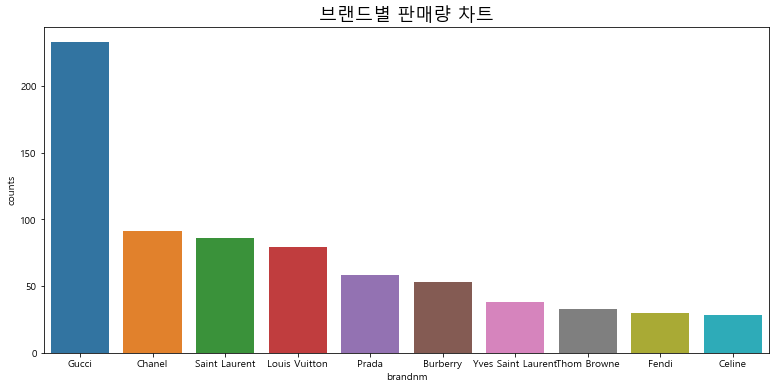

In [192]:
# 그럼 전체 유저가 가장 많이 구매한 브랜드는?
plt.figure(figsize=(13,6))
sns.barplot(data = df.groupby('brandnm')['user'].value_counts().groupby('brandnm').sum().sort_values(ascending = False).reset_index().head(10),
           x = 'brandnm', y = 'user')
plt.ylabel('counts')
plt.title('브랜드별 판매량 차트', fontsize=18);


In [193]:
# 구찌, 샤넬, 생로랑, 루이비통, 프라다, 버버리, 톰브라운, 펜디 등의 명품임
# 사람들이 뭔가 중요한 자리에 참석하기 위해, 또는 SNS 업로드를 위해 명품 하나 걸치고 싶을 때 렌트하는 듯
# 뭔가 명품 악세사리 렌탈 서비스로의 비즈니스 방향 전환도 생각해볼 수 있겠다.

<br>

## 2021년 가입한 신규 유저와 이전에 가입한 기존 유저의 차이는?

In [194]:
# 1. 신규/기존 유저 sub_type 

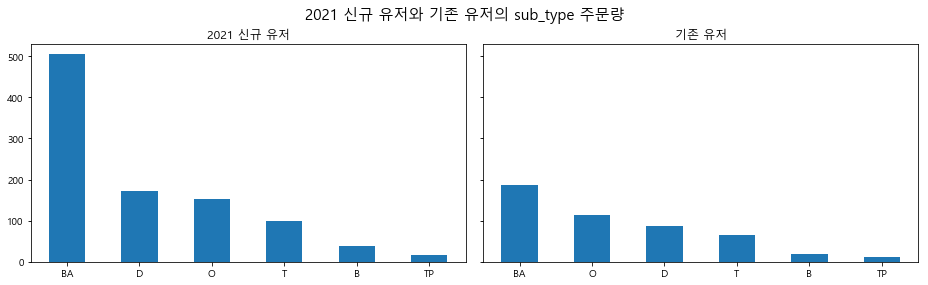

In [195]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13,4), sharey=True)
fig.suptitle('2021 신규 유저와 기존 유저의 sub_type 주문량', fontsize=15)
df.query('new==1').sub_type.value_counts().plot.bar(rot=0, title='2021 신규 유저', ax=axes[0])
df.query('new==0').sub_type.value_counts().plot.bar(rot=0, title='기존 유저', ax=axes[1])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

In [196]:
# 두 그룹 모두 가방을 많이 구매했지만, 비율을 보았을 땐, 신규 유저가 가방을 구매한 비중이 더 높다.

In [197]:
print('신규 유저의 가방 구매 비율은',round(df.query("new == 1 and sub_type == 'BA'").shape[0]/df.query("new == 1").shape[0] * 100,2), '이다.')
print('기존 유저의 가방 구매 비율은',round(df.query("new == 0 and sub_type == 'BA'").shape[0]/df.query("new == 0").shape[0] * 100,2), '이다.')

신규 유저의 가방 구매 비율은 51.22 이다.
기존 유저의 가방 구매 비율은 38.56 이다.


In [198]:

# 2. 신규/기존 유저 브랜드 선호도

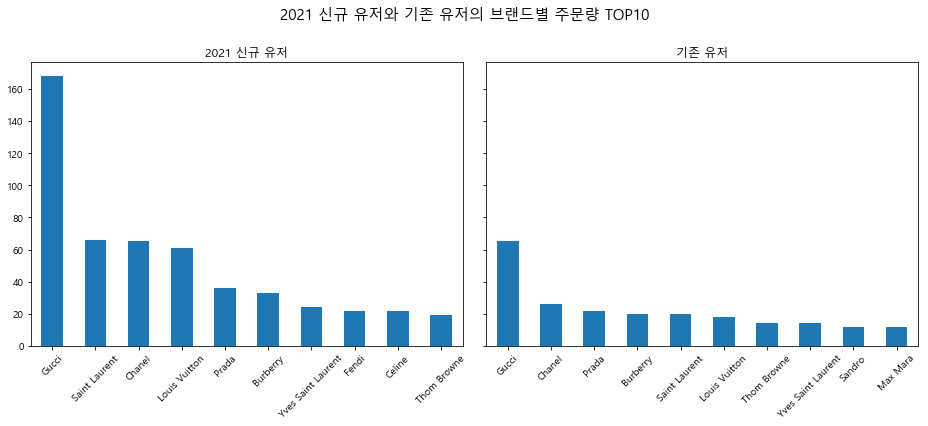

In [199]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13,6), sharey=True)
fig.suptitle('2021 신규 유저와 기존 유저의 브랜드별 주문량 TOP10', fontsize=15)
df.query('new==1').brandnm.value_counts().head(10).plot.bar(rot=45, title='2021 신규 유저', ax=axes[0])
df.query('new==0').brandnm.value_counts().head(10).plot.bar(rot=45, title='기존 유저', ax=axes[1])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

In [200]:
# 브랜드의 경우 전반적으로 럭셔리 브랜드를 선호하는 모습이다.
# 기존 유저는 구찌 이외의 다른 브랜드에 대신 선호도가 크게 없지만,
# 신규 유저의 경우 생로랑, 루이비통, 샤넬의 구매 비중이 늘어났다.

In [201]:
print('신규 유저의 구찌 구매 비율은',round(df.query("new == 1 and brandnm == 'Gucci'").shape[0]/df.query("new == 1").shape[0] * 100,2), '이다.')
print('기존 유저의 구찌 구매 비율은',round(df.query("new == 0 and brandnm == 'Gucci'").shape[0]/df.query("new == 0").shape[0] * 100,2), '이다.')

신규 유저의 구찌 구매 비율은 17.04 이다.
기존 유저의 구찌 구매 비율은 13.4 이다.


In [202]:
print('신규 유저의 선호 브랜드 2순위의 구매 비율은',round(df.query("new == 1 and brandnm == 'Saint Laurent'").shape[0]/df.query("new == 1").shape[0] * 100,2), '이다.')
print('기존 유저의 선호 브랜드 2순위의 구매 비율은',round(df.query("new == 0 and brandnm == 'Chanel'").shape[0]/df.query("new == 0").shape[0] * 100,2), '이다.')

신규 유저의 선호 브랜드 2순위의 구매 비율은 6.69 이다.
기존 유저의 선호 브랜드 2순위의 구매 비율은 5.36 이다.


In [203]:
# 3. 신규 유저들의 선호도가 높은 브랜드들은 "가방" 중심의 브랜드라고 생각된다.
# 그럼 신규 유저 선호도 상위 브랜드들의 가방 판매 비중은?

In [204]:
brand_bag_per = {'brand' :
                ['Gucci', 'Saint Laurent', 'Chanel', 'Louis Vuitton'],
                'bag_per' :
                [round(df[(df["brandnm"] == "Gucci") & (df["sub_type"] == "BA") & (df["new"] == 1)].shape[0] / df[(df["brandnm"] == "Gucci")  & (df["new"] == 1)].shape[0] * 100, 2),
                round(df[(df["brandnm"] == "Saint Laurent") & (df["sub_type"] == "BA") & (df["new"] == 1)].shape[0] / df[(df["brandnm"] == "Saint Laurent")  & (df["new"] == 1)].shape[0] * 100, 2),
                round(df[(df["brandnm"] == "Chanel") & (df["sub_type"] == "BA") & (df["new"] == 1)].shape[0] / df[(df["brandnm"] == "Chanel")  & (df["new"] == 1)].shape[0] * 100, 2),
                round(df[(df["brandnm"] == "Louis Vuitton") & (df["sub_type"] == "BA") & (df["new"] == 1)].shape[0] / df[(df["brandnm"] == "Louis Vuitton")  & (df["new"] == 1)].shape[0] * 100, 2)]}

new_brand_bag = pd.DataFrame(brand_bag_per)

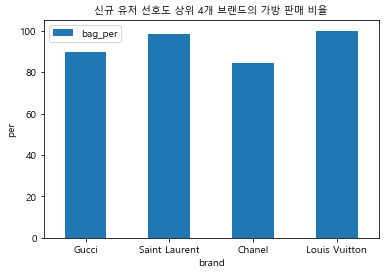

In [205]:
new_brand_bag.plot(kind = 'bar', x = 'brand', rot = 0)
plt.ylabel('per')
plt.title('신규 유저 선호도 상위 4개 브랜드의 가방 판매 비율', fontsize = 10);

In [206]:
new_brand_bag

,brand,bag_per
0,Gucci,89.88
1,Saint Laurent,98.48
2,Chanel,84.62
3,Louis Vuitton,100.00


In [207]:
print('신규 유저의 전체 중 가방 구매 비율은',round(df.query("new == 1 and sub_type == 'BA'").shape[0]/df.query("new == 1").shape[0] * 100,2), '이다.')
print('기존 유저의 전체 중 가방 구매 비율은',round(df.query("new == 0 and sub_type == 'BA'").shape[0]/df.query("new == 0").shape[0] * 100,2), '이다.')

신규 유저의 전체 중 가방 구매 비율은 51.22 이다.
기존 유저의 전체 중 가방 구매 비율은 38.56 이다.


In [208]:
# 신규 유저의 경우 상위 4개 브랜드(구찌, 생로랑, 채널, 루이비통)에 대해서 가방 구매 비율이 압도적으로 높았다.
# 위 브랜드에서 가방을 렌트하는 비중이 전체 약 93%
# 전체 렌트 건수 중 가방을 빌리는 비율은 50% 정도인걸 감안하면.. 엄청 높다.
# 이렇게 보니 확실하게 명품백에 대한 수요가 커지는게 보인다.
# 명품백에 대한 수요가 늘어나고 있으니 공급책(셰어러)을 찾는 방법을 생각해보아야겠다.

In [209]:
# 이와 관련된 추가로

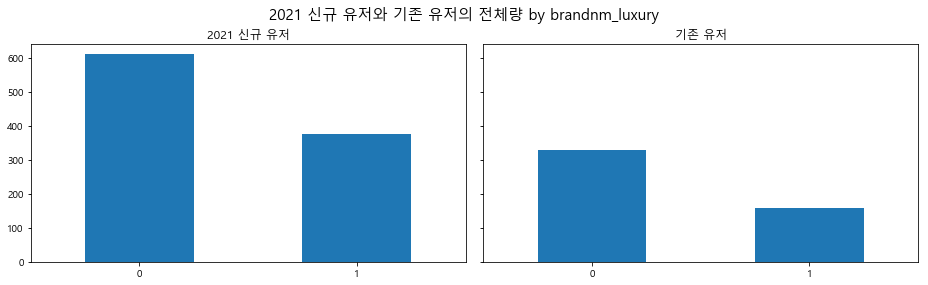

In [210]:
# 전체 상품 렌트 중에 럭셔리 양
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13,4), sharey=True)
fig.suptitle('2021 신규 유저와 기존 유저의 전체량 by brandnm_luxury', fontsize=15)
df.query('new == 1').brandnm_luxury.value_counts().plot.bar(rot=0, title='2021 신규 유저', ax=axes[0])
df.query('new == 0').brandnm_luxury.value_counts().plot.bar(rot=0, title='기존 유저', ax=axes[1])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

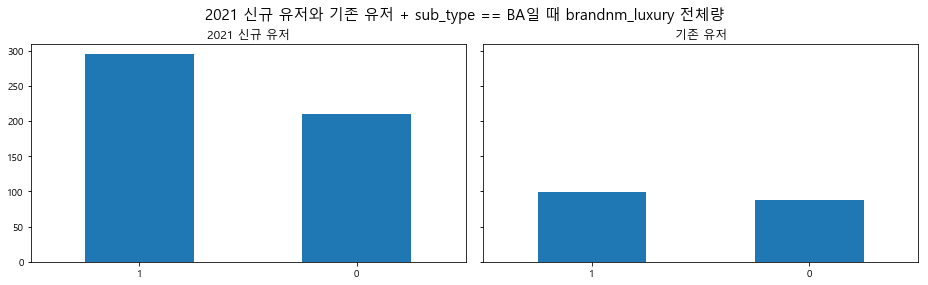

In [211]:
# 빽 렌트 중에 럭셔리 양
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13,4), sharey=True)
fig.suptitle('2021 신규 유저와 기존 유저 + sub_type == BA일 때 brandnm_luxury 전체량', fontsize=15)
df.query('new == 1 and sub_type == "BA"').brandnm_luxury.value_counts().plot.bar(rot=0, title='2021 신규 유저', ax=axes[0])
df.query('new == 0 and sub_type == "BA"').brandnm_luxury.value_counts().plot.bar(rot=0, title='기존 유저', ax=axes[1])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

In [212]:
# 전체 상품의 렌트량을 brandnm_luxury로 나눠보았을 때는 명품에 속하지 않은 상품을 더 많이 찾는 모습이다.
# 빽 구매 유저로 filter를 넣으면, 명품 렌트량이 더 많아지는 모습. 특히 신규유저!


## 📃 정리

1. 요일별 렌트량을 보았을 때, 주중 특히 화수목에 렌트 건수가 많았는데, 그 이유는 금토일에 상품을 입기 위해서일 것이다.

2. 가입 후 1일 이내 첫 구매고객의 증가율은 2월에 전월 대비 100%가 증가했는데, 행사를 진행했기 때문으로 보인다. (찬서님 코드에 지인님 코멘트)

3. 2021년 가입한 `신규 유저`와 이전에 가입한 `기존 유저`로 나누어 보았을 때
    
    - 구찌는 원래 많이 렌트한다.
    - 브랜드의 경우 전반적으로 럭셔리 브랜드를 선호하는 모습이다.<br>
        기존 유저는 구찌 이외의 다른 브랜드에 대신 선호도가 크게 없지만, 신규 유저의 경우 생로랑, 루이비통, 샤넬의 구매 비중이 늘어났다.
    - 두 그룹 모두 가방을 많이 구매했지만, 비율을 보았을 땐, 신규 유저가 가방을 구매한 비중이 더 높다.
    - 신규 유저의 경우 상위 4개 브랜드(구찌, 생로랑, 채널, 루이비통)에 대해서 가방 구매 비율이 압도적으로 높았다. 약 93%


## ✏️ 비즈니스적으로 생각할만한 부분

- 신규 유저는 명품백을 위해 돈을 지불한다. 명품백 공급망을 늘려야한다.
- **명품백 중심으로** 푸시 알림을 때린다.<br>
    ex) 루이비통 백 신규 5종 검수 완료. 이번 주말 나들이에 들고가기 딱 좋아요!


#### 한계
분석을 하며 느낀 한계는 5.18 회의 때 찬서님이 말해주신 것처럼 새로 증가한 브랜드들에 대해서는 트렌드가 바뀐 것인지, 아니면 이전에는 없던 제품이 2021년 들어 생기면서 구매가 많아진 건지는 정확하게 알 수 없다. 

예) 동섭님 코드에서 브랜드 Fendi의 렌트는 2021년 이전 0건이었는데, 이후에는 많아졌다. 2021년 1월에 제품이 업로드된 거라면 트렌드가 바꼈다고 말할 수 있을까??

하나 확실한 건 2021년 신규유저의 구매력이 상승했다는 점이다. 마케팅 때문이든 아니면 입소문 때문이든..



In [ ]:
# 이후 진행
# 필수 : 2021 신규/ 기존 고객 분류 더보기
# 가방 카테고리 가격?
# 텍스트 마이닝 제품 색상?